### Recursion

A recursive definition is one in which the defined term appears in the definition itself. Self-referential situations often crop up in real life, even if they aren’t immediately recognizable as such. For example, suppose you wanted to describe the set of people that make up your ancestors. You could describe them this way:

Your Ancestors = (Your Parents) + (Your parents' Ancestors)

Recursive definition of ancestors
Notice how the concept that is being defined, ancestors, shows up in its own definition. This is a recursive definition.

In programming, recursion has a very precise meaning. It refers to a coding technique in which a function calls itself.

# Recursion in Python
When you call a function in Python, the interpreter creates a new local namespace so that names defined within that function don’t collide with identical names defined elsewhere. One function can call another, and even if they both define objects with the same name, it all works out fine because those objects exist in separate namespaces.
The same holds true if multiple instances of the same function are running concurrently. For example, consider the following definition:


In [ ]:
def function():
    x = 10
    function()

When function() executes the first time, Python creates a namespace and assigns x the value 10 in that namespace. 
Then function() calls itself recursively. The second time function() runs, the interpreter creates a second namespace
and assigns 10 to x there as well. These two instances of the name x are distinct from each another and can coexist 
without clashing because they are in separate namespaces.
Unfortunately, running function() as it stands produces a result that is less than inspiring, as the following traceback shows:


In [ ]:
>>> function()
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "<stdin>", line 3, in function
  File "<stdin>", line 3, in function
  File "<stdin>", line 3, in function
  [Previous line repeated 996 more times]
RecursionError: maximum recursion depth exceeded

As written, function() would in theory go on forever, calling itself over and over without any of the calls ever returning. In practice, of course, nothing is truly forever. Your computer only has so much memory, and it would run out eventually.
Python doesn’t allow that to happen. The interpreter limits the maximum number of times a function can call itself recursively, and when it reaches that limit, it raises a RecursionError exception, as you see above.

Technical note: You can find out what Python’s recursion limit is with a function from the sys module called getrecursionlimit():

In [ ]:
>>> from sys import getrecursionlimit
>>> getrecursionlimit()
1000
You can change it, too, with setrecursionlimit():

>>> from sys import setrecursionlimit
>>> setrecursionlimit(2000)
>>> getrecursionlimit()
2000
You can set it to be pretty large, but you can’t make it infinite.

A function that calls itself recursively must have a plan to eventually stop. Recursive functions typically follow this pattern:

1. There are one or more base cases that are directly solvable without the need for further recursion.
2. Each recursive call moves the solution progressively closer to a base case.

You’re now ready to see how this works with some examples.

In [1]:
# The first example is a function called countdown(), which takes a positive number as an argument 
# and prints the numbers from the specified argument down to zero:

def countdown(n):
    print(n)
    if n == 0:
        return             # Terminate recursion
    else:
        countdown(n - 1)   # Recursive call


countdown(5)

5
4
3
2
1
0


Notice how countdown() fits the paradigm for a recursive algorithm described above:

The base case occurs when n is zero, at which point recursion stops.
In the recursive call, the argument is one less than the current value of n, so each recursion moves closer to the base case.

Note: For simplicity, countdown() doesn’t check its argument for validity. If n is either a non-integer or negative, you’ll get a RecursionError exception because the base case is never reached.

The version of countdown() shown above clearly highlights the base case and the recursive call, but there’s a more concise way to express it:


In [2]:
def countdown(n):
    print(n)
    if n > 0:
        countdown(n - 1)
        

countdown(5)

5
4
3
2
1
0


In [ ]:
# Here’s one possible non-recursive implementation for comparison:

>>> def countdown(n):
...     while n >= 0:
...         print(n)
...         n -= 1
...

>>> countdown(5)

# This is a case where the non-recursive solution is at least as clear and intuitive as the recursive one, 
# and probably more so.

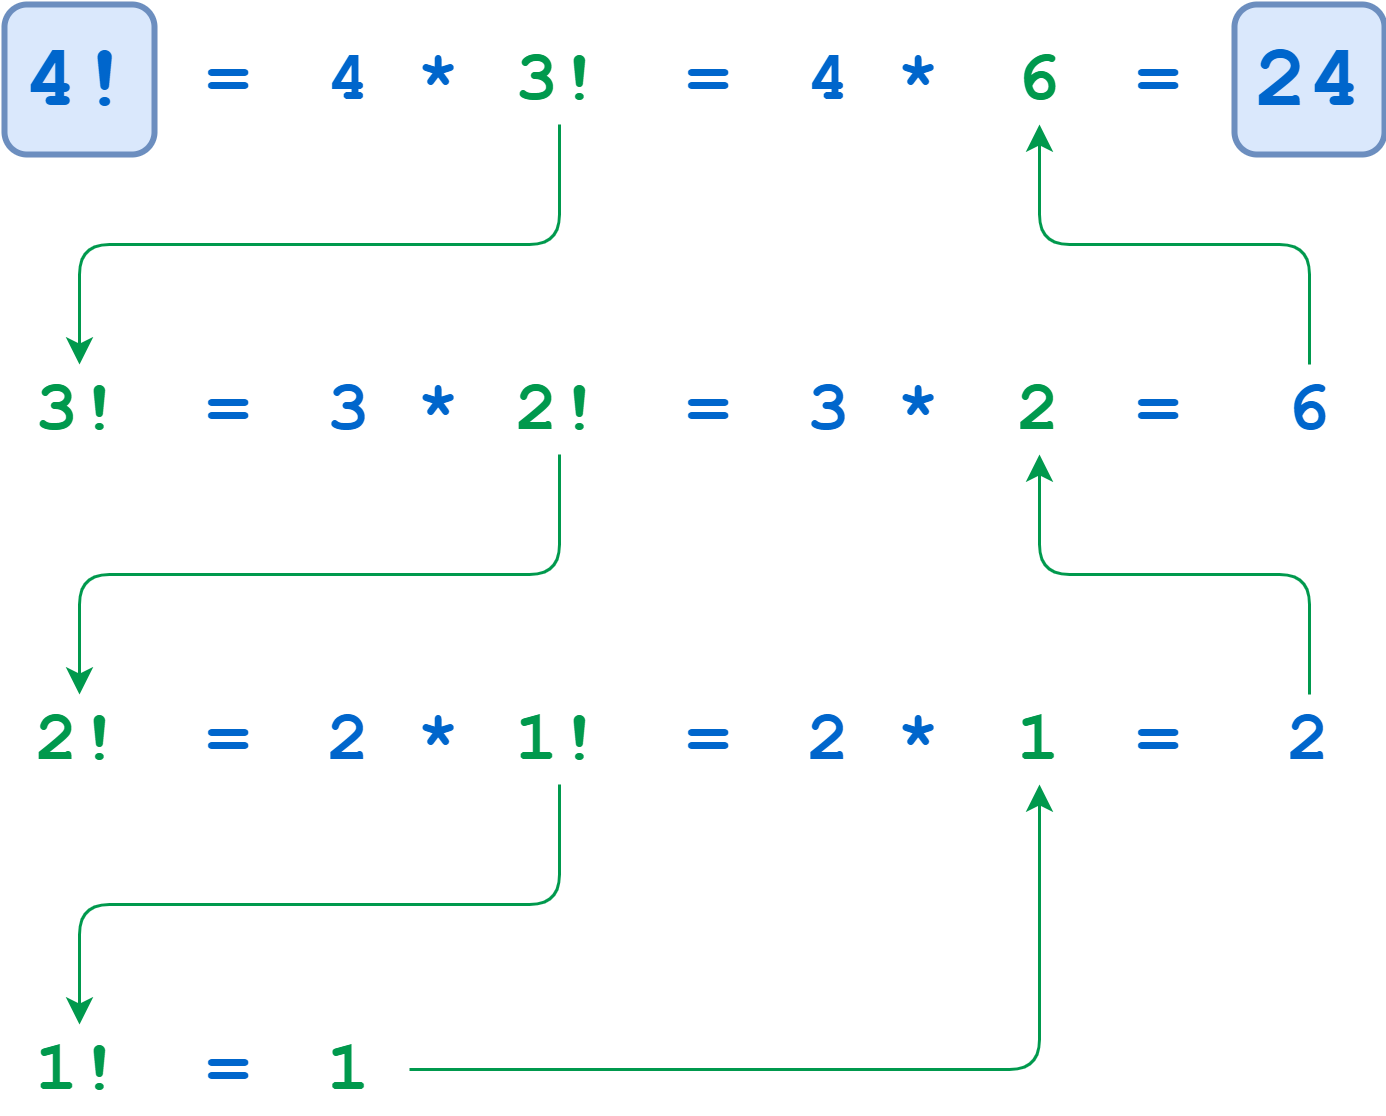


#### Factorial illustration
For example, recursive computation of 4! looks like this:

Factorial illustration
Recursive Calculation of 4!
The calculations of 4!, 3!, and 2! suspend until the algorithm reaches the base case where n = 1. At that point, 1! is computable without further recursion, and the deferred calculations run to completion.

Define a Python Factorial Function
Here’s a recursive Python function to calculate factorial. Note how concise it is and how well it mirrors the definition shown above:


In [ ]:
def factorial(n):
    return 1 if n <= 1 else n * factorial(n - 1)


factorial(4)
24


In [ ]:
# A little embellishment of this function with some print() statements gives a clearer idea of the call and return sequence:

def factorial(n):
    print(f"factorial() called with n = {n}")
    return_value = 1 if n <= 1 else n * factorial(n -1)
    print(f"-> factorial({n}) returns {return_value}")
    return return_value


factorial(4)
factorial() called with n = 4
factorial() called with n = 3
factorial() called with n = 2
factorial() called with n = 1
-> factorial(1) returns 1
-> factorial(2) returns 2
-> factorial(3) returns 6
-> factorial(4) returns 24
24



Notice how all the recursive calls stack up. The function gets called with n = 4, 3, 2, and 1 in succession before 
any of the calls return. Finally, when n is 1, the problem can be solved without any more recursion. Then each of the stacked-up recursive calls unwinds back out, returning 1, 2, 6, and finally 24 from the outermost call.
Recursion isn’t necessary here. You could implement factorial() iteratively using a for loop:


In [ ]:
def factorial(n):
    return_value = 1
    for i in range(2, n + 1):
        return_value *= i
    return return_value


factorial(4)
24


# You can also implement factorial using Python’s reduce(), which you can import from the functools module:
from functools import reduce
def factorial(n):
    return reduce(lambda x, y: x * y, range(1, n + 1) or [1])


factorial(4)
24

Again, this shows that if a problem is solvable with recursion, there will also likely be several viable non-recursive solutions as well. You’ll typically choose based on which one results in the most readable and intuitive code.

Another factor to take into consideration is execution speed. There can be significant performance differences between recursive and non-recursive solutions. In the next section, you’ll explore these differences a little further.

Speed Comparison of Factorial Implementations
To evaluate execution time, you can use a function called timeit() from a module that is also called timeit. This function supports a number of different formats, but you’ll use the following format in this tutorial:

timeit(<command>, setup=<setup_string>, number=<iterations>)
timeit() first executes the commands contained in the specified <setup_string>. Then it executes <command> the given number of <iterations> and reports the cumulative execution time in seconds:


In [ ]:

from timeit import timeit

timeit("print(string)", setup="string='foobar'", number=100)
foobar
foobar
foobar
   .
   . [100 repetitions]
   .
foobar
0.03347089999988384
Here, the setup parameter assigns string the value 'foobar'. Then timeit() prints string one hundred times. The total execution time is just over 3/100 of a second.

The examples shown below use timeit() to compare the recursive, iterative, and reduce() implementations of factorial from above. In each case, setup_string contains a setup string that defines the relevant factorial() function. timeit() then executes factorial(4) a total of ten million times and reports the aggregate execution.

First, here’s the recursive version:

setup_string = """
print("Recursive:")
def factorial(n):
    return 1 if n <= 1 else n * factorial(n - 1)
"""

from timeit import timeit
timeit("factorial(4)", setup=setup_string, number=10000000)
Recursive:
4.957105500000125
Next up is the iterative implementation:

setup_string = """
print("Iterative:")
def factorial(n):
    return_value = 1
    for i in range(2, n + 1):
        return_value *= i
    return return_value
"""

from timeit import timeit
timeit("factorial(4)", setup=setup_string, number=10000000)
Iterative:
3.733752099999947
Last, here’s the version that uses reduce():

setup_string = """
from functools import reduce
print("reduce():")
def factorial(n):
    return reduce(lambda x, y: x * y, range(1, n + 1) or [1])
"""

from timeit import timeit
timeit("factorial(4)", setup=setup_string, number=10000000)
reduce():
8.101526299999932

In this case, the iterative implementation is the fastest, although the recursive solution isn’t far behind. The method using reduce() is the slowest. Your mileage will probably vary if you try these examples on your own machine. You certainly won’t get the same times, and you may not even get the same ranking.

Does it matter? There’s a difference of almost four seconds in execution time between the iterative implementation and the one that uses reduce(), but it took ten million calls to see it.

If you’ll be calling a function many times, you might need to take execution speed into account when choosing an implementation. On the other hand, if the function will run relatively infrequently, then the difference in execution times will probably be negligible. In that case, you’d be better off choosing the implementation that seems to express the solution to the problem most clearly.

For factorial, the timings recorded above suggest a recursive implementation is a reasonable choice.

Frankly, if you’re coding in Python, you don’t need to implement a factorial function at all. It’s already available in the standard math module:

from math import factorial
factorial(4)
24
Perhaps it might interest you to know how this performs in the timing test:

setup_string = "from math import factorial"

from timeit import timeit
timeit("factorial(4)", setup=setup_string, number=10000000)
0.3724050999999946
Wow! math.factorial() performs better than the best of the other three implementations shown above by roughly a factor of 10.

Technical note: The fact that math.factorial() is so much speedier probably has nothing to do with whether it’s implemented recursively. More likely it’s because the function is implemented in C rather than Python. For more reading on Python and C, see these resources:

Python Bindings: Calling C or C++ From Python
Building a Python C Extension Module
C for Python Programmers
Your Guide to the CPython Source Code
CPython Internals book
A function implemented in C will virtually always be faster than a corresponding function implemented in pure Python.
